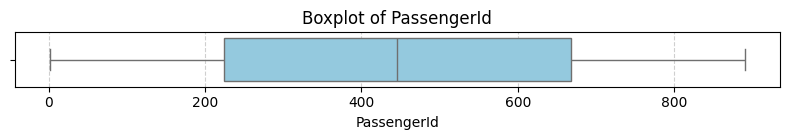

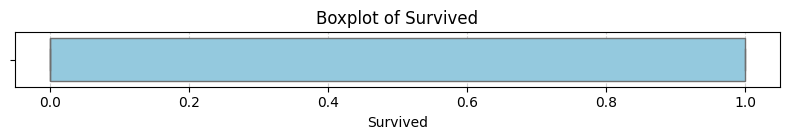

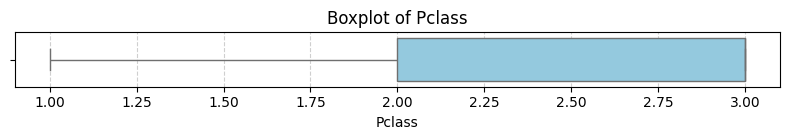

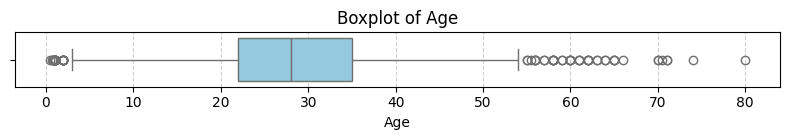

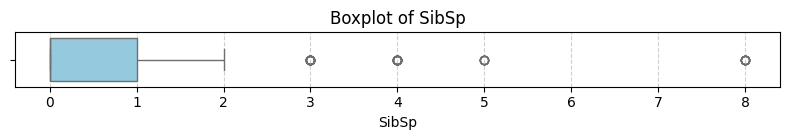

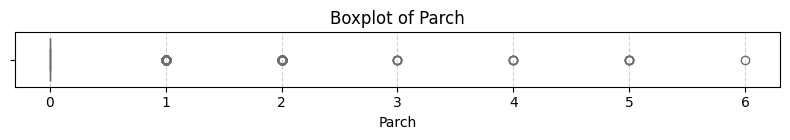

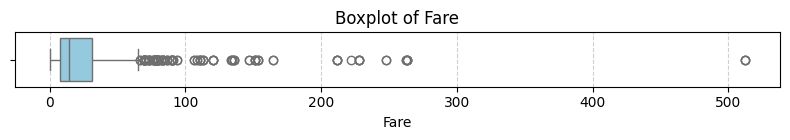

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('Titanic_cleaned.csv')  # use your actual cleaned file name


numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns


for col in numeric_cols:
    plt.figure(figsize=(8, 1.5))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.grid(True, axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


In [1]:
import pandas as pd

# Load your cleaned Titanic dataset
df = pd.read_csv("Titanic_cleaned.csv")

# Define the IQR-based outlier removal function
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    print(f"{col}: Removed {len(df) - len(filtered_df)} outliers")
    return filtered_df

# Apply to selected columns (excluding 'Parch')
df_filtered = df.copy()
for col in ['Age', 'Fare', 'SibSp']:
    df_filtered = remove_outliers_iqr(df_filtered, col)

# Save the final cleaned file
df_filtered.to_csv("Titanic_cleaned_no_outliers.csv", index=False)
print("✅ Final dataset saved as Titanic_cleaned_no_outliers.csv")


Age: Removed 66 outliers
Fare: Removed 107 outliers
SibSp: Removed 29 outliers
✅ Final dataset saved as Titanic_cleaned_no_outliers.csv


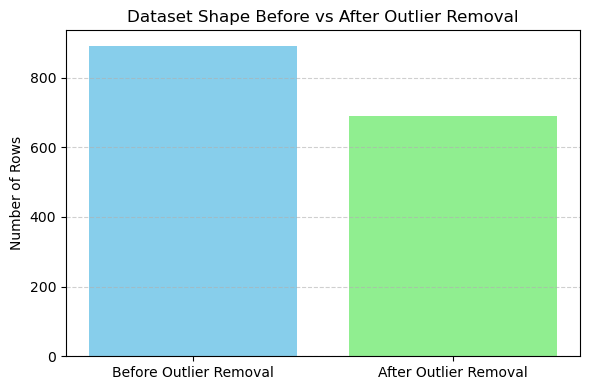

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
df_before = pd.read_csv('Titanic_cleaned.csv')  # Before outlier removal
df_after = pd.read_csv('Titanic_cleaned_no_outliers.csv')  # After outlier removal

# Row counts
counts = {
    'Before Outlier Removal': len(df_before),
    'After Outlier Removal': len(df_after)
}

# Plot
plt.figure(figsize=(6, 4))
plt.bar(counts.keys(), counts.values(), color=['skyblue', 'lightgreen'])
plt.title('Dataset Shape Before vs After Outlier Removal')
plt.ylabel('Number of Rows')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## ✅ Conclusion

In this notebook, we visualized potential outliers using boxplots and then removed statistical outliers from key numeric features (`Age`, `Fare`, `SibSp`, and `Parch`) using the IQR method.  
Outlier removal helps reduce noise, improve model generalization, and stabilize training behavior.

The final cleaned and outlier-free dataset is now ready for modeling and evaluation.
